# <span style="color:green"> ESERCITAZIONE 12 </span>

### <span style="color:blue">  Esercizio 12.1 </span> 
<span style="color:blue"> 1. Addestrare una rete neurale a riconoscere le cifre da $0$ a $9$ scritte a mano. Eseguire la rete neurale che si trova nel testo dell'Esercitazione $12$. </span> 

L'obiettivo di questa Esercitazione è imparare ad usare le reti neurali profonde, DNN, per riconoscere e distinguere le cifre da $0$ a $9$ scritte a mano. Nell'Esercitazione $11$ abbiamo usato le reti neurali per risolvere dei problemi di regressione. In questa Esercitazione andremo a risolvere un problema di **classificazione**: facendo vedere un'immagine alla rete neurale, questa deve **saper riconoscere a quale categoria** appartenga l'immagine. 

All'inizio è necessario **addestrare la rete** a riconoscere le cifre. Per svolgere questo compito la rete neurale sarà addestrata **guardando** le cifre scritte a mano che si trovano nell'archivio MNIST. Una volta che ha imparato, sarà in grado di **riconoscere** le cifre da $0$ a $9$ che le faremo vedere. Le cifre che saranno mostare alla rete sono di dimensione $28\times 28$ pixel e ciascuno di questi tasselli è colorato in **scala di grigio**, dal bianco al nero, per un totale di $256$ tonalità. 

Che cosa vuol dire che i neuroni guardano le immagini? Propongo  un'analogia con l'Esercitazione $11$. Nel problema di regressione, alla rete neurale si danno come dati di training delle **coppie di punti** $(x,y)$: la **rete impara** che a quella data $x$ corrisponde proprio quella data $y$ **e costruirirà** un po' alla volta **un modello** che a quella $x$ associa quella $y$. Il modello che stiamo cercando è la funzione $f$ che associa i punti: $y=f(x)$. Una volta che la rete è stata **addestrata sarà in grado da sola**, grazie al modello che ha costruito, data una $x$ di input **di associare** la $y$ di output corrispondente. 

Nel problema di classificazione, alla rete neurale si danno come dati di training le **immagini bidimensionali** costituite dai pixel, i tassellini che le compongono: queste sono l'analogo delle $x$ nel problema di regressione. Chi sono le $y$? Le immagini sono corredate dalle **label**, le etichette che dicono quale numero sia rappresentato nell'immagine. Durante il processo di addestramento, l'immagine viene **scomposta nei suoi pixel** che vengono dati ai neuroni e di ciascun tassello la label dice ai neuroni **a quale cifra corrispondano**. 

Durante questa fase, i neuroni imparano che quel pezzetto di immagine corrisponde a quella determinata cifra. Una volta che la rete è stata addestrata, quando le saranno fornite delle immagini di input mai viste, **sarà in grado da sola di associare quel tassello** di immagine **alla cifra corretta**. Il processo viene eseguito per tutti i tasselli dell'immagine. L'output del processo di classificazione è la label che **dice quale cifra sia raffigurata** nell'immagine. 

Il processo viene **ripetuto** in modo che la rete neurale faccia più esperienza e diventi **sempre più brava** a riconoscere le cifre. La rete deve essere esposta tante volte alla vista della cifre ma non in una quantità eccessiva, altrimenti si ottiene il fenomeno dell'**overfitting**, ossia il modello trovato non riproduce più la legge che produce i punti, ma tiene conto delle oscillazioni dei punti rispetto alla legge.

Il **processo di riconoscimento** avviene nel modo seguente. L'**immagine viene decomposta** nei suoi singoli pixel, in tutto $784$ e vengono inviati ai neuroni del layer iniziale. Ciascun layer, in base all'esperienza pregressa, **dice con quale probabilità** questo pezzettino di immagine **appartenga** a una certa cifra. Per esempio, una linea dritta verticale potrebbe appartenere a un $1$ piuttosto che a un $4$, mentre una linea curva potrebbe appartenere a un $6$ o a un $9$. Una linea verticale potrebbe appartenere a un $7$, visto che il suo corpo centrale è una linea obliqua, ma sicuramente non apparterrà a uno $0$. Per ogni tassello esistono $10$ probabilità che esso appartenga a ciascuna delle $10$ cifre, ma **alcune probabilità sono più alte** di altre, a seconda della cifra che rappresenta. 

Le **informazioni vengono ripesate** in base alla probabiltà di essere una cifra piuttosto che un'altra tramite un processo di **convoluzione** e vengono inviate ai **layer più interni** che a loro volta svolgeranno la **stessa operazione** fino ad arrivare al layer finale. Qui ci sono **tanti neuroni quanti i possibili output** che in questo caso sono $10$ come le cifre intere tra $0$ e $9$ e ad **accendersi** sarà quello corrispondente alla **cifra mostrata**. L'operazione di riconoscimento viene svolta correttamente se la rete è stata addestrata bene, altrimenti potrebbe o sbagliare a riconoscere la cifra o essere indecisa tra più di una. 

All'inzio del processo, i neuroni del layer di inuput *osservano* un pixel e *dicono* secondo loro a quale cifra appartenga e con quale probabilità. In seguito l'**informazione viene passata** ai neuroni dei layer più interni e rielaborata **ripesando le probabilità**. Tra tutte le possibilità di essere una certa cifra alla fine **ne rimarrà solo una**. Addentrandosi sempre di più nei layer la probabilità che si tratti di quella cifra diventa sempre più alta e giunta all'ultimo layer, sarà **tutta convogliata** al neurone corrispondente a quella cifra. Questo è il significato dell'espressione *si accende il neurone corrispondente alla cifra mostrata*.

Nel testo dell'Esercitazione ci è stato donato il codice che ci consentirà di addestrare la rete neurale. Durante questo esercizio compilo ed eseguo questo codice, in modo da imparare come funziona tale rete neurale e da svolgere i primi riconoscimenti di cifre.

### Rete neurale

In [1]:
#Richiamo le librerie.
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

2024-06-19 17:38:06.677325: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#Step 1. Carico il dataset dal mnist.
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)


In [3]:
#Funzione to categorical. Sarà la label, il neurone che si accende.
# Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
labels = np.array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many columns as there are classes.
# The number of rows stays the same.
keras.utils.to_categorical(labels)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 4


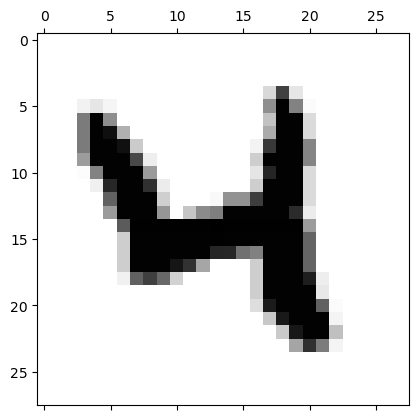

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [4]:
# reshape data and convert labels to be used with categorical cross entropy
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [5]:
#Step 2. Definisco la rete neurale.
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [6]:
#Step 3. Scelgo l'ottimizzatore e la funzione costo e compilo il modello.
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  #optimizer=Adam(),
                  #optimizer=Adagrad(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [7]:
#Step 4. Alleno il modello.

# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

2024-06-19 17:02:36.803632: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-19 17:02:36.804233: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7882 - acc: 0.7667 - val_loss: 0.3224 - val_acc: 0.9100
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3934 - acc: 0.8878 - val_loss: 0.2438 - val_acc: 0.9297
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3172 - acc: 0.9098 - val_loss: 0.2053 - val_acc: 0.9413
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2723 - acc: 0.9229 - val_loss: 0.1802 - val_acc: 0.9467
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2402 - acc: 0.9321 - val_loss: 0.1628 - val_acc: 0.9520


313/313 [==============================] - 1s 4ms/step - loss: 0.1628 - acc: 0.9520

Test loss: 0.16279517114162445
Test accuracy: 0.9520000219345093


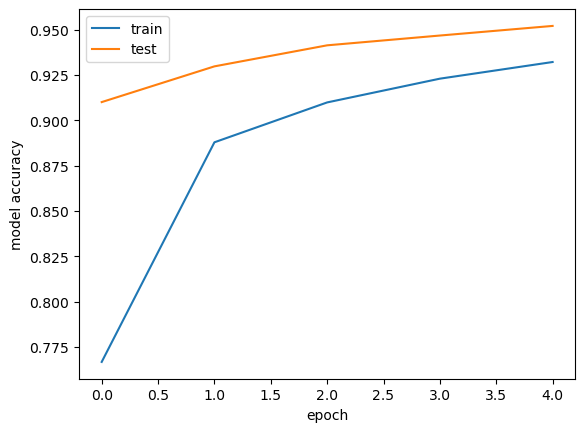

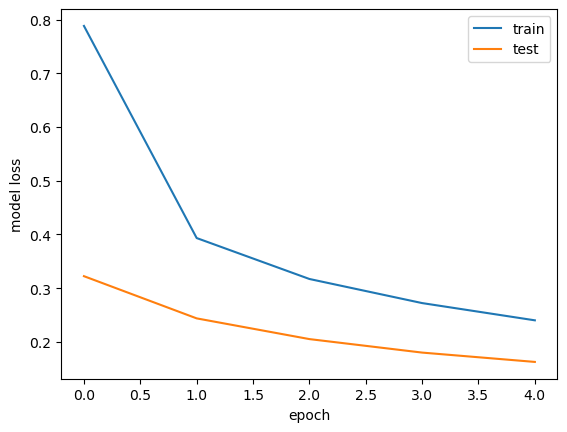

In [8]:
#Step 5. Valuto le performance del modello.
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

313/313 [==============================] - 1s 2ms/step


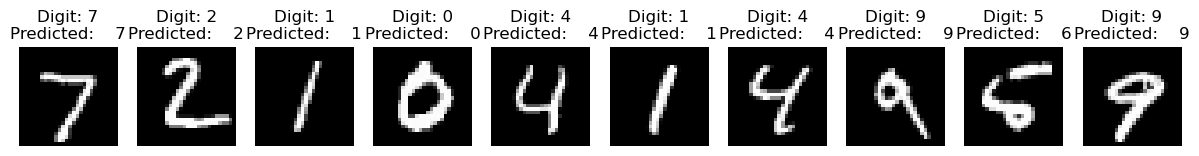

In [9]:
#Step 6. Ora che il modello è pronto, genero nuovi punti applicandolo.
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Grazie al codice che ci è stato donato, è stato possibile costruire e addestrare una rete neurale a riconoscere le cifre da $0$ a $9$.

<span style="color:blue"> 2. Cambia i parametri della rete neurale e rieseguila. Modifica il numero di epoche, prova almeno due ottimizzatori diversi. Commenta le performance. </span> 

Ripeto l'esercizio del processo di riconoscimento delle $10$ cifre con più epoche: questa volta saranno $50$ invece di $5$. Rieseguo l'esercizio per tre volte, per tre diversi ottimizzatori: **SGD** come prima, ma questa volta è diverso il numero di epoche, **Adam** e **Adagrad**. Eseguo il modello mediante lo specchietto dell'esercizio sopra, mentre di seguito presento i grafici delle performace, per ciascuno dei tre ottimizzatori.

<span style="color:blue"> a. Processo di classificazione con SGD. </span> 

313/313 [==============================] - 1s 3ms/step - loss: 0.0599 - acc: 0.9812

Test loss: 0.05994877219200134
Test accuracy: 0.9811999797821045


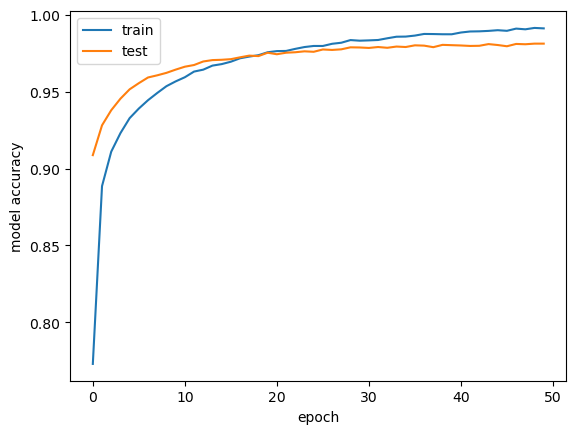

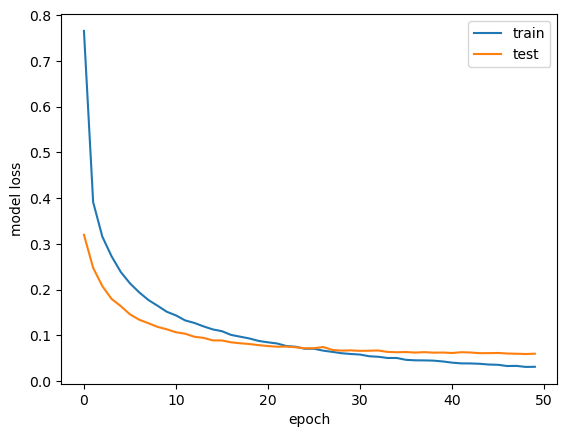

In [8]:
#Step 5. Valuto le performance del modello per SGD per 50 epoche.
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

313/313 [==============================] - 1s 3ms/step


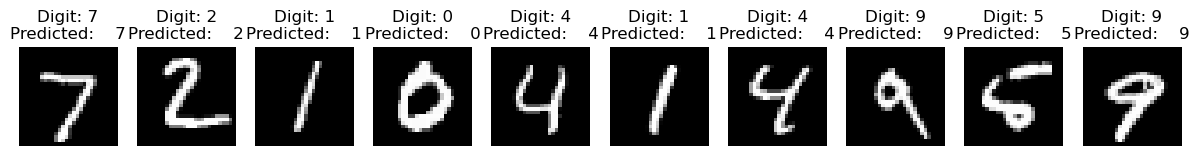

In [9]:
#Il modello con SGD è pronto. Lo applico per riconoscere le cifre.
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

<span style="color:blue"> b. Processo di classificazione con Adam. </span> 

313/313 [==============================] - 1s 3ms/step - loss: 0.2328 - acc: 0.9832

Test loss: 0.2328072488307953
Test accuracy: 0.9832000136375427


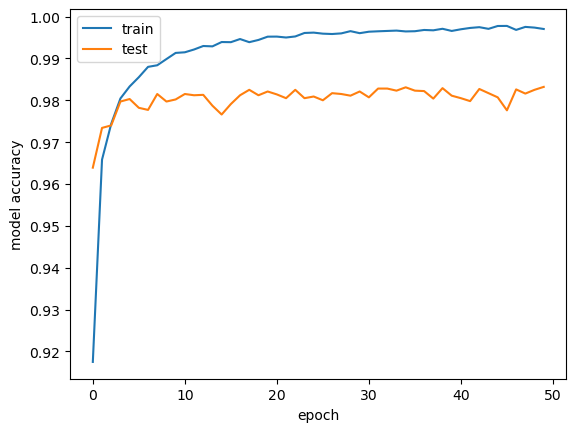

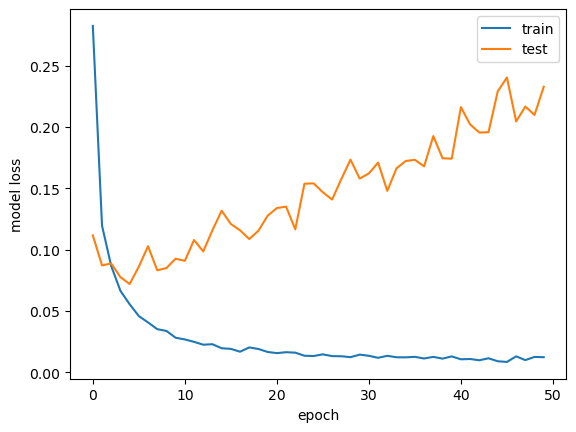

In [8]:
#Step 5. Valuto le performance del modello per Adam per 50 epoche.
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

313/313 [==============================] - 1s 3ms/step


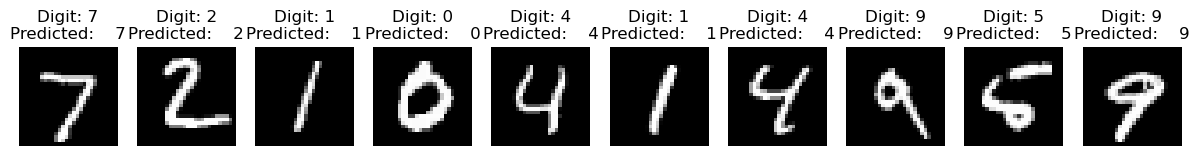

In [9]:
#Il modello con Adam è pronto. Lo applico per riconoscere le cifre.
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

<span style="color:blue"> c. Processo di classificazione con Adagrad. </span> 

313/313 [==============================] - 1s 3ms/step - loss: 0.1484 - acc: 0.9549

Test loss: 0.14840848743915558
Test accuracy: 0.9549000263214111


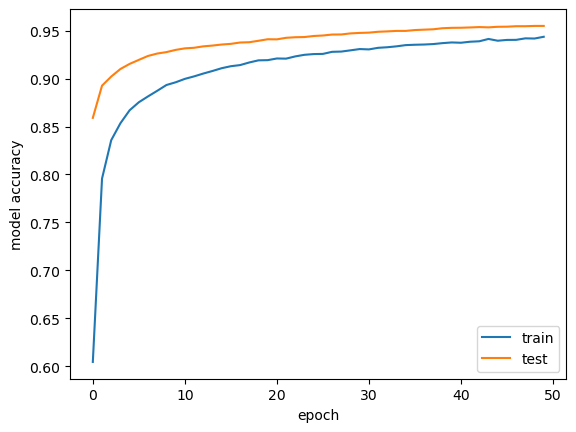

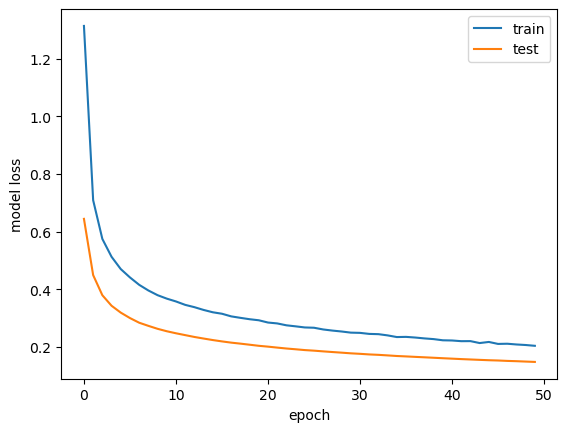

In [10]:
#Step 5. Valuto le performance del modello per Adagrad per 50 epoche.
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

313/313 [==============================] - 1s 2ms/step


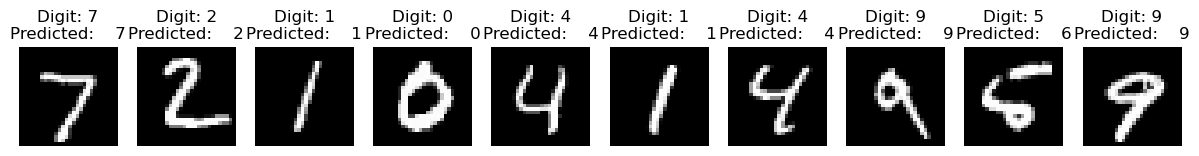

In [11]:
#Il modello con Adagrad è pronto. Lo applico per riconoscere le cifre.
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

### Osservazioni

Questi sono i risultati per i tre ottimizzatori: 

1. SGD. Loss$=0.0599$, Accuratezza$=0.9812$.
2. Adam. Loss$=0.2328$, Accuratezza$=0.9832$.
3. Adagrad. Loss$=0.1484$, Accuratezza$=0.9549$.

Si ottiene il **risultato migliore per** lo stochastic gradient descent, **SGD**. In questo caso le due coppie di curve accuratezza e loss, per dati di train e di test, sono di forma simile e vicine tra loro, anche se non proprio sovrapposte. Riconosce tutte le cifre proposte. L'accuratezza è del $98\%$ in questo caso.

Adam è meno preciso e le curve per i dati di test sono frastagliate e crescenti: non va bene. Anche Adagrad è meno preciso di SGD, ma in questo caso funziona meglio di Adam. Le due coppie di curve sia dell'accuratezza sia della loss, per dati di train e di test, sono di forma simile ma non sono vicine. L'accuratezza è del $98\%$ nel primo caso e del $95\%$ nel secondo. 

Considerando valore della loss, accuratezza e forma della curva, SGD è il migliore quindi è l'ottimizzatore che scelgo per i prossimi esercizi.